# Loan Prediction - Data Science Assignment

#### Matlab inline

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Suppressing warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt

#### Loading the data

In [4]:
train = pd.read_csv("./data/train.csv") 
test = pd.read_csv("./data/test.csv") 

#### Creating a full dataframe

In [5]:
frames = [train, test]
full_df = pd.concat(frames)
full_df.shape

(981, 13)

In [6]:
cols = full_df.columns.tolist()
cols = cols[-5:] + cols[:-5] # Shifting the LoanStatus column position to the left
full_df = full_df[cols]

### Ininital examination of the data

In [7]:
full_df.head(2)

,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term
0,LP001002,Y,No,Urban,No,5849,0.0,1.0,0,Graduate,Male,NaN,360.0
1,LP001003,N,Yes,Rural,No,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0


In [8]:
train.describe() # Summary of numerical variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Examining variables

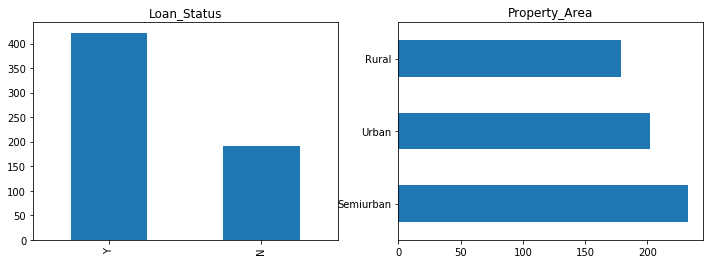

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Loan_Status")
train.Loan_Status.value_counts().plot(kind='bar')

ax2 = fig.add_subplot(122)
train.Property_Area.value_counts().plot(kind='barh')
ax2.set_title("Property_Area")

In [10]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

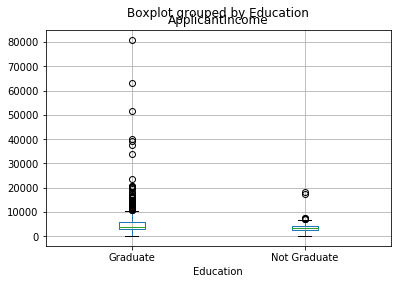

In [11]:
train.boxplot(column='ApplicantIncome', by = 'Education')

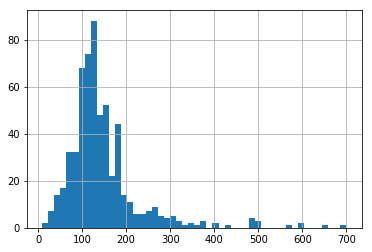

In [12]:
train['LoanAmount'].hist(bins=50)

## Dealing with missing values

In [13]:
full_df.isnull().sum() # Checking number of missing values

Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
dtype: int64

In [14]:
full_df.dtypes # Checking the data types

Loan_ID               object
Loan_Status           object
Married               object
Property_Area         object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History       float64
Dependents            object
Education             object
Gender                object
LoanAmount           float64
Loan_Amount_Term     float64
dtype: object

In [15]:
from sklearn.preprocessing import Imputer # Loading the imputer library

#### Creating an imputer DataFrameImputer function for categorical values

In [16]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

#### Filling missing values in 'Loan Amount'

In [17]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
full_df["LoanAmount"] = imp.fit_transform(full_df.LoanAmount.values.reshape(-1,1))

#### Filling missing values in categorcial variables

In [18]:
full_df = DataFrameImputer().fit_transform(full_df)

In [19]:
full_df.isnull().sum() # Verifying no more missing values exist in the dataframe

Loan_ID              0
Loan_Status          0
Married              0
Property_Area        0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Dependents           0
Education            0
Gender               0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

### Encoding of the columns

In [20]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    full_df[i] = le.fit_transform(full_df[i].astype(str))

In [21]:
full_df.head(2)

,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term
0,LP001002,1,0,2,0,5849,0.0,1.0,0,0,1,126.0,360.0
1,LP001003,0,1,0,0,4583,1508.0,1.0,1,0,1,128.0,360.0


# Creating new features

#### Applicant Income (log)
The income each applicant

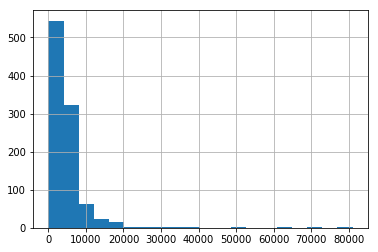

In [22]:
full_df['ApplicantIncome'].hist(bins=20)

A log function is necessary in order to normalize the data

In [23]:
full_df['ApplicantIncome_log'] = np.where((full_df['ApplicantIncome']<2.72), 0, np.log(full_df['ApplicantIncome']))

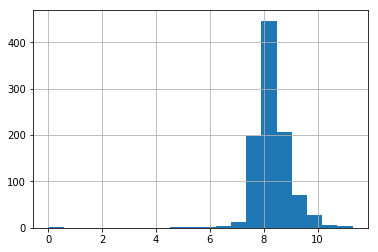

In [24]:
full_df['ApplicantIncome_log'].hist(bins=20)

#### CoApplicant Income (log)
Income of the co-applicant

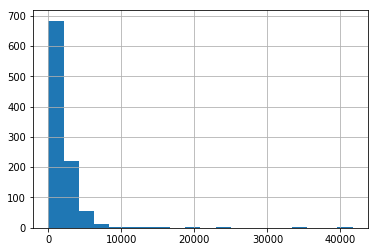

In [25]:
full_df['CoapplicantIncome'].hist(bins=20)

A log function is necessary in order to normalize the data

In [26]:
full_df['CoapplicantIncome_log'] = np.where((full_df['CoapplicantIncome']<2.72), 0, np.log(full_df['CoapplicantIncome']))

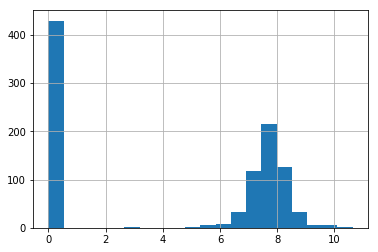

In [27]:
full_df['CoapplicantIncome_log'].hist(bins=20)

#### Loan Amount (log)
The amount of the loan

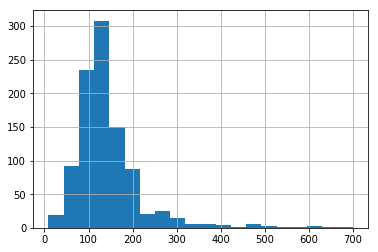

In [28]:
full_df['LoanAmount'].hist(bins=20)

A log function is necessary in order to normalize the data

In [29]:
full_df['LoanAmount_log'] = np.log(full_df['LoanAmount'])

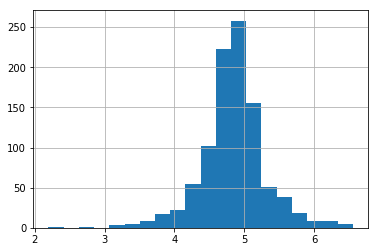

In [30]:
full_df['LoanAmount_log'].hist(bins=20)

#### Total Income (log)
Total income of the as the sum of the applicant and co-applicant incomes

In [31]:
full_df['TotalIncome'] = full_df['ApplicantIncome'] + full_df['CoapplicantIncome']

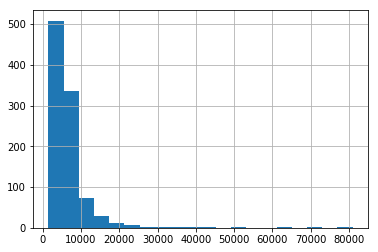

In [32]:
full_df['TotalIncome'].hist(bins=20) 

A log function is necessary in order to normalize the data

In [33]:
full_df['TotalIncome_log'] = np.log(full_df['TotalIncome'])

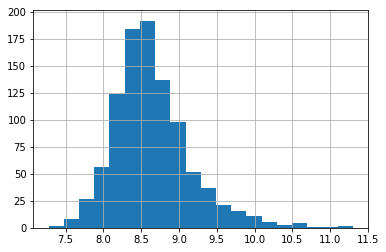

In [34]:
full_df['TotalIncome_log'].hist(bins=20) 

#### Loan Ratio
The ratio between the loan amount and the total income

In [35]:
full_df['Loan_Ratio'] = (full_df['LoanAmount'] / full_df['TotalIncome'])

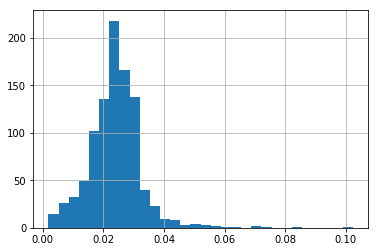

In [36]:
full_df['Loan_Ratio'].hist(bins=30)

#### Family Size
Total size of the family

In [37]:
full_df['Family_Size'] = np.where(((full_df['CoapplicantIncome']>0) | (full_df['Married'] == 1)), full_df['Dependents'] + 2, full_df['Dependents'] + 1)

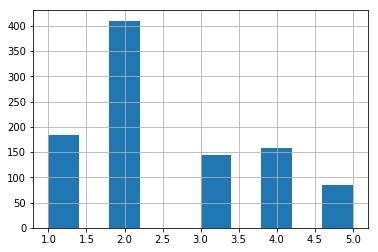

In [38]:
full_df['Family_Size'].hist()

#### Income Per Capita
Income per family member

In [39]:
full_df['Income_Per_Capita'] = full_df['TotalIncome']/full_df['Family_Size']

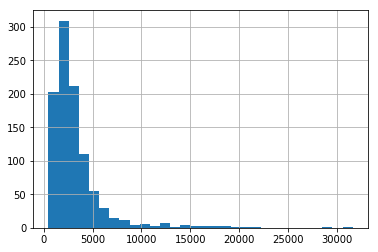

In [40]:
full_df['Income_Per_Capita'].hist(bins = 30)

A log function is necessary in order to normalize the data

In [41]:
full_df['Income_Per_Capita_log'] = np.log(full_df['Income_Per_Capita'])

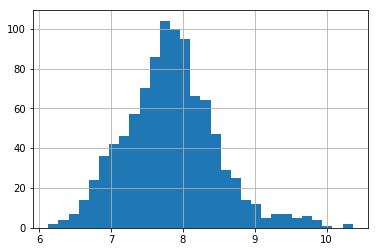

In [42]:
full_df['Income_Per_Capita_log'].hist(bins = 30)

#### Loan Per Month
Loan amount per month

In [43]:
full_df['Loan_Per_Month'] = full_df['LoanAmount']/full_df['Loan_Amount_Term']

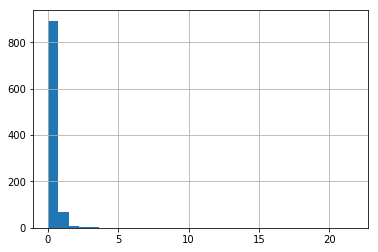

In [44]:
full_df['Loan_Per_Month'].hist(bins = 30)

A log function is necessary in order to normalize the data

In [45]:
full_df['Loan_Per_Month_log'] = np.log(full_df['Loan_Per_Month'])

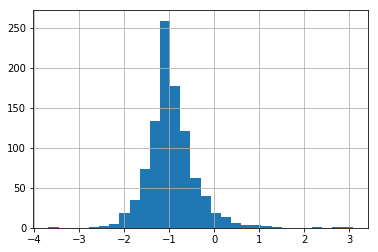

In [46]:
full_df['Loan_Per_Month_log'].hist(bins = 30)

#### Loan Per Month By Total Income
The loan per month by the total income of the applicant and co-applicant

In [47]:
full_df['Loan_PM_TotInc'] = full_df['Loan_Per_Month']/full_df['TotalIncome']

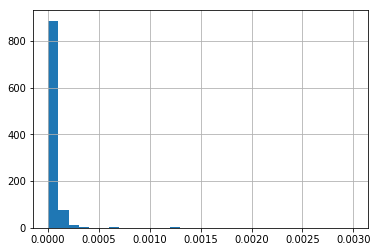

In [48]:
full_df['Loan_PM_TotInc'].hist(bins = 30)

A log function is necessary in order to normalize the data

In [49]:
full_df['Loan_PM_TotInc_log'] = np.log(full_df['Loan_PM_TotInc'])

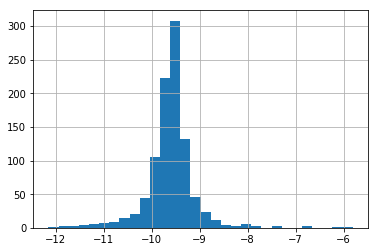

In [50]:
full_df['Loan_PM_TotInc_log'].hist(bins = 30)

#### Loan Amount Per Capita
The loan amount per income of each family member

In [51]:
full_df['LoanAmount_Per_Capita'] = full_df['LoanAmount']/full_df['Income_Per_Capita']

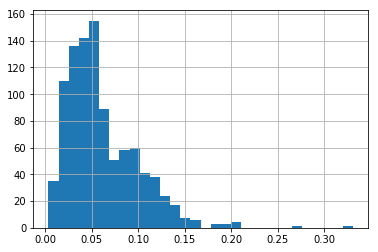

In [52]:
full_df['LoanAmount_Per_Capita'].hist(bins = 30)

A log function is necessary in order to normalize the data

In [53]:
full_df['LoanAmount_Per_Capita_log'] = np.log(1000*full_df['LoanAmount_Per_Capita'])

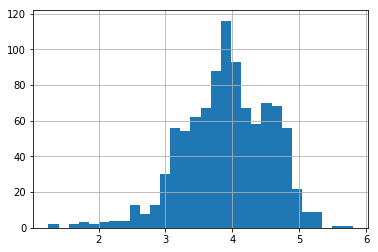

In [54]:
full_df['LoanAmount_Per_Capita_log'].hist(bins = 30)

#### Loan Per Month Per Capita
Loan per month by each family member

In [55]:
full_df['Loan_PM_PCapita'] = full_df['Loan_Per_Month']/full_df['LoanAmount_Per_Capita']

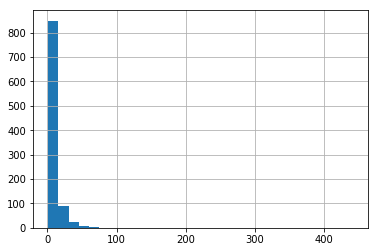

In [56]:
full_df['Loan_PM_PCapita'].hist(bins = 30)

A log function is necessary in order to normalize the data

In [57]:
full_df['Loan_PM_PCapita_log'] = np.log(full_df['Loan_PM_PCapita'])

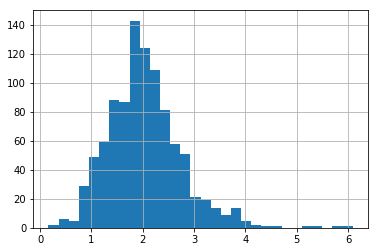

In [58]:
full_df['Loan_PM_PCapita_log'].hist(bins = 30)

### Checking correlation between the new features
Testing only the new features

In [59]:
correlation_features = ['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log', 'TotalIncome_log', 'Loan_Ratio', 'Income_Per_Capita_log', 
                        'Loan_Per_Month_log', 'Loan_PM_TotInc_log', 'LoanAmount_Per_Capita_log', 'Loan_PM_PCapita_log']

In [60]:
full_df[correlation_features].corr()

,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,TotalIncome_log,Loan_Ratio,Income_Per_Capita_log,Loan_Per_Month_log,Loan_PM_TotInc_log,LoanAmount_Per_Capita_log,Loan_PM_PCapita_log
ApplicantIncome_log,1.000000,-0.342355,0.395688,0.624233,-0.371562,0.476670,0.339218,-0.265867,-0.187654,0.432238
CoapplicantIncome_log,-0.342355,1.000000,0.134579,0.165583,-0.081405,-0.124546,0.111130,-0.047758,0.219495,-0.113727
LoanAmount_log,0.395688,0.134579,1.000000,0.629056,0.290221,0.345995,0.791336,0.215925,0.374386,0.270300
TotalIncome_log,0.624233,0.165583,0.629056,1.000000,-0.486237,0.651778,0.542458,-0.426941,-0.193545,0.594392
Loan_Ratio,-0.371562,-0.081405,0.290221,-0.486237,1.000000,-0.378891,0.169982,0.674485,0.582360,-0.398073
Income_Per_Capita_log,0.476670,-0.124546,0.345995,0.651778,-0.378891,1.000000,0.269749,-0.368488,-0.740465,0.881005
Loan_Per_Month_log,0.339218,0.111130,0.791336,0.542458,0.169982,0.269749,1.000000,0.528073,0.300267,0.498641
Loan_PM_TotInc_log,-0.265867,-0.047758,0.215925,-0.426941,0.674485,-0.368488,0.528073,1.000000,0.518857,-0.064096
LoanAmount_Per_Capita_log,-0.187654,0.219495,0.374386,-0.193545,0.582360,-0.740465,0.300267,0.518857,1.000000,-0.677085
Loan_PM_PCapita_log,0.432238,-0.113727,0.270300,0.594392,-0.398073,0.881005,0.498641,-0.064096,-0.677085,1.000000


##### By the correlation results we decided to drop the following columns: 
* Income_Per_Capita_log
* Loan_Per_Month_log

In [61]:
drop_list = ['Income_Per_Capita_log', 'Loan_Per_Month_log']
full_df.drop(drop_list, axis=1, inplace=True) # Dropping the columns

In [62]:
full_df.shape

(981, 28)

#### Saving the modified data to the disc

In [63]:
full_df.to_csv('modified_df.csv',encoding='utf-8-sig')

## Building a Predictive Model

In [64]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Import models from xgboost learn module:
import xgboost
from xgboost import XGBClassifier

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on full_dfing set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for full_df, test in kf:
    # Filter full_dfing data
    full_df_predictors = (data[predictors].iloc[full_df,:])
    
    # The target we're using to full_df the algorithm.
    full_df_target = data[outcome].iloc[full_df]
    
    # full_dfing the algorithm using the predictors and target.
    model.fit(full_df_predictors, full_df_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Splitting the full dataframe to train & test

In [65]:
full_df.shape

(981, 28)

In [66]:
train = full_df[:614]
test = full_df[614:]

## Modeling The Data

##### The models that will be examined are the following classification models:
* KNN
* Gaussian Naive Bayes
* SVM
* XGBoost
* Linear Discriminant Analysis
* Ensemble

### The models briefly explained

#### KNN (K- Nearest Neighbors)
It can be used for both classification and regression problems. However, it is more widely used in classification problems in the industry. K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases by a majority vote of its k neighbors. The case being assigned to the class is most common amongst its K nearest neighbors measured by a distance function.

These distance functions can be Euclidean, Manhattan, Minkowski and Hamming distance. First three functions are used for continuous function and fourth one (Hamming) for categorical variables. If K = 1, then the case is simply assigned to the class of its nearest neighbor. At times, choosing K turns out to be a challenge while performing KNN modeling.

#### Gaussian Naive Bayes
It is a classification technique based on Bayes’ theorem with an assumption of independence between predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, a naive Bayes classifier would consider all of these properties to independently contribute to the probability that this fruit is an apple.

Naive Bayesian model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

#### SVM (Support Vector Machine)
In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate.
For example, if we only had two features like Height and Hair length of an individual, we’d first plot these two variables in two dimensional space where each point has two co-ordinates (these co-ordinates are known as Support Vectors)

#### Decision Tree (CART)
It is a type of supervised learning algorithm that is mostly used for classification problems. Surprisingly, it works for both categorical and continuous dependent variables. In this algorithm, we split the population into two or more homogeneous sets. This is done based on most significant attributes/ independent variables to make as distinct groups as possible.

#### XGBoost (Extreme Gradient Boosting)
The XGBoost has an immensely high predictive power which makes it the best choice for accuracy in events as it possesses both linear model and the tree learning algorithm, making the algorithm almost 10x faster than existing gradient booster techniques.

One of the most interesting things about the XGBoost is that it is also called a regularized boosting technique. This helps to reduce overfit modelling and has a massive support for a range of languages such as Scala, Java, R, Python, Julia and C++.

#### Linear Discriminant Analysis
Linear Discriminant Analysis (LDA) is a classification method originally developed in 1936 by R. A. Fisher. It is simple, mathematically robust and often produces models whose accuracy is as good as more complex methods.		
 		
LDA is based upon the concept of searching for a linear combination of variables (predictors) that best separates two classes (targets). To capture the notion of separability, Fisher defined the following score function.

#### Ensemble Learning
Ensemble is the art of combining diverse set of learners (individual models) together to improvise on the stability and predictive power of the model. In the above example, the way we combine all the predictions together will be termed as Ensemble Learning.

### Practical part

##### Setting the outcome variable

In [67]:
outcome_var = 'Loan_Status'

### Initial examination of the models

LDA: 0.809483 (0.029787)
KNN: 0.783402 (0.045498)
CART: 0.700415 (0.056597)
NB: 0.811117 (0.032041)
SVM: 0.807849 (0.027250)
XGBoost: 0.804644 (0.035159)


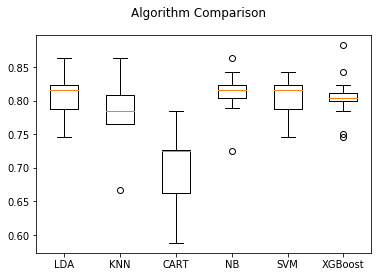

In [68]:
from sklearn import model_selection

train_target = train['Loan_Status'].as_matrix()
features = ['Credit_History', 'Loan_PM_TotInc_log', 'Loan_Ratio']
train_vars = train[features].copy().as_matrix()
X, Y = train_vars, train_target

# Prepare configuration for cross validation
seed = 7

# Prepare models
models = []
models.append(('LDA', LinearDiscriminantAnalysis())) # Adding the LinearDiscriminantAnalysis model
models.append(('KNN', KNeighborsClassifier())) # Adding the KNN model
models.append(('CART', DecisionTreeClassifier())) # Adding the CART model
models.append(('NB', GaussianNB())) # Adding the Naive Bayes model
models.append(('SVM', SVC())) # Adding the SVM model
models.append(('XGBoost', XGBClassifier())) # Adding the XGBoost model

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=12, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Plot the model comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Examination of ensemble modeling

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

train_target = train['Loan_Status'].as_matrix()
features = ['Credit_History', 'Loan_PM_TotInc_log']
train_vars = train[features].copy().as_matrix()
X, y = train_vars, train_target

# Prepare models
clf1 = LinearDiscriminantAnalysis() # Adding the LinearDiscriminantAnalysis model
clf2 = XGBClassifier(random_state=1) # Adding the XGBoost model
clf3 = GaussianNB() # Adding the Naive Bayes model
clf4 = DecisionTreeClassifier() # Adding the CART model
clf5 = KNeighborsClassifier() # Adding the KNN model
clf6 = SVC() # Adding the SVM model

# Preparing the voting model
eclf = VotingClassifier(estimators=[('lda', clf1), ('xgboost', clf2), ('gnb', clf3), ('cart', clf4), ('knn', clf5), ('svm', clf6)], voting='hard')

# Scoring and printing the output
for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, eclf], ['LinearDiscriminantAnalysis', 'XGBClassifier', 'naive Bayes', 'CART', 'KNN', 'SVM', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.81 (+/- 0.03) [LinearDiscriminantAnalysis]
Accuracy: 0.79 (+/- 0.03) [XGBClassifier]
Accuracy: 0.81 (+/- 0.03) [naive Bayes]
Accuracy: 0.70 (+/- 0.05) [CART]
Accuracy: 0.78 (+/- 0.03) [KNN]
Accuracy: 0.81 (+/- 0.03) [SVM]
Accuracy: 0.80 (+/- 0.03) [Ensemble]


In [70]:
# Predicting with the Ensemble model
predictor_var = ['Credit_History', 'Loan_PM_TotInc_log']
classification_model(eclf, train,predictor_var,outcome_var)

Accuracy : 82.736%
Cross-Validation Score : 80.132%


In [71]:
# Saving the prediction of the Test to the disc
test2 = test[predictor_var].copy()
submit = test['Loan_ID']
preds = eclf.predict(test2)
preds = pd.Series(preds)
submit = pd.concat([submit, preds], names=['Loan_ID', 'Loan_Status'], axis=1)
submit.columns = ['Loan_ID', 'Loan_Status']
submit['Loan_Status'] = submit['Loan_Status'].map({1:'Y', 0:'N'})
submit.to_csv('submit/Ensemble.csv', index=False)

## KNN

In [72]:
# Predicting with the KNN model
model = KNeighborsClassifier(n_neighbors=12)
predictor_var = ['Credit_History', 'Loan_PM_TotInc_log']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 80.456%
Cross-Validation Score : 79.482%


In [73]:
# Saving the prediction of the Test to the disc
test2 = test[predictor_var].copy()
submit = test['Loan_ID']
preds = model.predict(test2)
preds = pd.Series(preds)
submit = pd.concat([submit, preds], names=['Loan_ID', 'Loan_Status'], axis=1)
submit.columns = ['Loan_ID', 'Loan_Status']
submit['Loan_Status'] = submit['Loan_Status'].map({1:'Y', 0:'N'})
submit.to_csv('submit/knn.csv', index=False)

## GaussianNB

In [74]:
# Predicting with the Naive Bayes model
model = GaussianNB()
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Property_Area', 'Loan_Ratio']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 81.433%
Cross-Validation Score : 80.948%


In [75]:
# Saving the prediction of the Test to the disc
test2 = test[predictor_var].copy()
submit = test['Loan_ID']
preds = model.predict(test2)
preds = pd.Series(preds)
submit = pd.concat([submit, preds], names=['Loan_ID', 'Loan_Status'], axis=1)
submit.columns = ['Loan_ID', 'Loan_Status']
submit['Loan_Status'] = submit['Loan_Status'].map({1:'Y', 0:'N'})
submit.to_csv('submit/GaussianNB.csv', index=False)

## SVM

In [76]:
predictor_var = [
 'Property_Area',
 'Credit_History',
 'Loan_PM_TotInc_log',
 'Loan_PM_PCapita_log'
]

### SVM with parameter tweaking

In [77]:
from sklearn.grid_search import GridSearchCV

Cs = [0.001, 0.01, 0.1, 0.5, 0.9, 1, 1.1, 1.5, 2, 10]
gammas = [0.001, 0.05, 0.01, 0.1, 0.2, 0.5, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

gsearch1 = GridSearchCV(estimator = SVC(kernel='rbf'), param_grid = param_grid, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictor_var],train[outcome_var])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


([mean: 0.72888, std: 0.04950, params: {'C': 0.001, 'gamma': 0.001},
  mean: 0.73997, std: 0.04240, params: {'C': 0.001, 'gamma': 0.05},
  mean: 0.75092, std: 0.04824, params: {'C': 0.001, 'gamma': 0.01},
  mean: 0.75552, std: 0.02174, params: {'C': 0.001, 'gamma': 0.1},
  mean: 0.75676, std: 0.04254, params: {'C': 0.001, 'gamma': 0.2},
  mean: 0.74297, std: 0.02469, params: {'C': 0.001, 'gamma': 0.5},
  mean: 0.75456, std: 0.01201, params: {'C': 0.001, 'gamma': 1},
  mean: 0.72888, std: 0.04950, params: {'C': 0.01, 'gamma': 0.001},
  mean: 0.75821, std: 0.03453, params: {'C': 0.01, 'gamma': 0.05},
  mean: 0.71993, std: 0.05463, params: {'C': 0.01, 'gamma': 0.01},
  mean: 0.74180, std: 0.03958, params: {'C': 0.01, 'gamma': 0.1},
  mean: 0.73017, std: 0.02304, params: {'C': 0.01, 'gamma': 0.2},
  mean: 0.74147, std: 0.01691, params: {'C': 0.01, 'gamma': 0.5},
  mean: 0.75715, std: 0.01612, params: {'C': 0.01, 'gamma': 1},
  mean: 0.71855, std: 0.06194, params: {'C': 0.1, 'gamma': 0.001}

In [78]:
# Predicting with the SVM tweaked model
model = SVC(kernel='rbf', gamma=0.01, C=1)
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.784%


In [79]:
# Saving the prediction of the Test to the disc
test2 = test[predictor_var].copy()
submit = test['Loan_ID']
preds = model.predict(test2)
preds = pd.Series(preds)
submit = pd.concat([submit, preds], names=['Loan_ID', 'Loan_Status'], axis=1)
submit.columns = ['Loan_ID', 'Loan_Status']
submit['Loan_Status'] = submit['Loan_Status'].map({1:'Y', 0:'N'})
submit.to_csv('submit/SVC_tweaked.csv', index=False)

### Default SVM

In [80]:
# Predicting with the SVM default model
model = SVC()
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 81.270%
Cross-Validation Score : 80.946%


In [81]:
# Saving the prediction of the Test to the disc
test2 = test[predictor_var].copy()
submit = test['Loan_ID']
preds = model.predict(test2)
preds = pd.Series(preds)
submit = pd.concat([submit, preds], names=['Loan_ID', 'Loan_Status'], axis=1)
submit.columns = ['Loan_ID', 'Loan_Status']
submit['Loan_Status'] = submit['Loan_Status'].map({1:'Y', 0:'N'})
submit.to_csv('submit/SVC.csv', index=False)

## XGBoost

### Default XGBoost

In [82]:
# Predicting with the XGBoost model
model = xgboost.XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=110, objective='binary:logistic', booster='gbtree', n_jobs=30) # Feature tweaking
predictor_var = ['Credit_History', 'Loan_PM_TotInc_log']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 83.388%
Cross-Validation Score : 78.507%


In [83]:
# Saving the prediction of the Test to the disc
test2 = test[predictor_var].copy()
submit = test['Loan_ID']
preds = model.predict(test2)
preds = pd.Series(preds)
submit = pd.concat([submit, preds], names=['Loan_ID', 'Loan_Status'], axis=1)
submit.columns = ['Loan_ID', 'Loan_Status']
submit['Loan_Status'] = submit['Loan_Status'].map({1:'Y', 0:'N'})
submit.to_csv('submit/xgboost.csv', index=False)

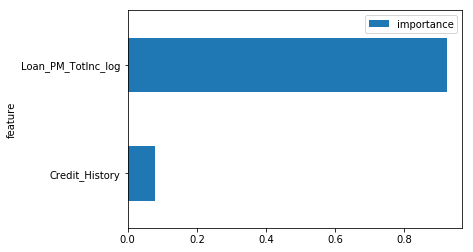

In [84]:
# Feature analysis
features = pd.DataFrame()
features['feature'] = predictor_var
features['importance'] = model.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh')

### XGBoost with parameter tweaking

In [85]:
import xgboost as xgb
target = outcome_var

In [86]:
predictors = [
 'Property_Area',
 'Credit_History',
 'Loan_PM_TotInc_log',
 'Loan_PM_PCapita_log'
]

#### Evaluation function

In [87]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                    
    features = pd.DataFrame()
    features['feature'] = predictors
    features['importance'] = alg.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    features.plot(kind='barh')


Model Report
Accuracy : 0.8322
AUC Score (Train): 0.882374


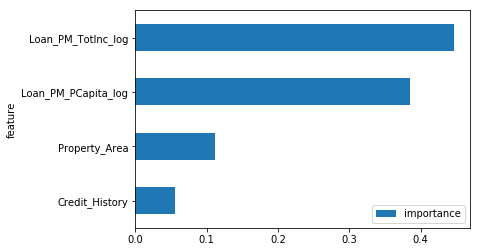

In [88]:
# First classifier
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=140,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)

#### Searching the best 'max_depth' & 'min_child_weight' values

In [89]:
param_test1 = {
 'max_depth':(3,10,2),
 'min_child_weight':(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.76619, std: 0.04670, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.78317, std: 0.03692, params: {'max_depth': 3, 'min_child_weight': 6},
  mean: 0.76502, std: 0.05249, params: {'max_depth': 3, 'min_child_weight': 2},
  mean: 0.74548, std: 0.05202, params: {'max_depth': 10, 'min_child_weight': 1},
  mean: 0.77857, std: 0.04492, params: {'max_depth': 10, 'min_child_weight': 6},
  mean: 0.75949, std: 0.05542, params: {'max_depth': 10, 'min_child_weight': 2},
  mean: 0.77713, std: 0.04071, params: {'max_depth': 2, 'min_child_weight': 1},
  mean: 0.79086, std: 0.03100, params: {'max_depth': 2, 'min_child_weight': 6},
  mean: 0.78143, std: 0.04096, params: {'max_depth': 2, 'min_child_weight': 2}],
 {'max_depth': 2, 'min_child_weight': 6},
 0.7908623084861475)

In [90]:
param_test2 = {
 'max_depth':[1,2,3],
 'min_child_weight':[5,6,7,8,9]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=2,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.78210, std: 0.02722, params: {'max_depth': 1, 'min_child_weight': 5},
  mean: 0.78437, std: 0.02787, params: {'max_depth': 1, 'min_child_weight': 6},
  mean: 0.79024, std: 0.02253, params: {'max_depth': 1, 'min_child_weight': 7},
  mean: 0.78327, std: 0.02396, params: {'max_depth': 1, 'min_child_weight': 8},
  mean: 0.77888, std: 0.02456, params: {'max_depth': 1, 'min_child_weight': 9},
  mean: 0.78876, std: 0.03539, params: {'max_depth': 2, 'min_child_weight': 5},
  mean: 0.79086, std: 0.03100, params: {'max_depth': 2, 'min_child_weight': 6},
  mean: 0.79239, std: 0.03116, params: {'max_depth': 2, 'min_child_weight': 7},
  mean: 0.79267, std: 0.02787, params: {'max_depth': 2, 'min_child_weight': 8},
  mean: 0.78313, std: 0.02948, params: {'max_depth': 2, 'min_child_weight': 9},
  mean: 0.77800, std: 0.04270, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.78317, std: 0.03692, params: {'max_depth': 3, 'min_child_weight': 6},
  mean: 0.78442, std: 0.04423, params: {

In [91]:
param_test2b = {
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=2,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.78210, std: 0.02722, params: {'max_depth': 1, 'min_child_weight': 5},
  mean: 0.78437, std: 0.02787, params: {'max_depth': 1, 'min_child_weight': 6},
  mean: 0.79024, std: 0.02253, params: {'max_depth': 1, 'min_child_weight': 7},
  mean: 0.78327, std: 0.02396, params: {'max_depth': 1, 'min_child_weight': 8},
  mean: 0.77888, std: 0.02456, params: {'max_depth': 1, 'min_child_weight': 9},
  mean: 0.78876, std: 0.03539, params: {'max_depth': 2, 'min_child_weight': 5},
  mean: 0.79086, std: 0.03100, params: {'max_depth': 2, 'min_child_weight': 6},
  mean: 0.79239, std: 0.03116, params: {'max_depth': 2, 'min_child_weight': 7},
  mean: 0.79267, std: 0.02787, params: {'max_depth': 2, 'min_child_weight': 8},
  mean: 0.78313, std: 0.02948, params: {'max_depth': 2, 'min_child_weight': 9},
  mean: 0.77800, std: 0.04270, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.78317, std: 0.03692, params: {'max_depth': 3, 'min_child_weight': 6},
  mean: 0.78442, std: 0.04423, params: {

#### Searching the best 'gamma' values

In [92]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,8)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=2,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.79267, std: 0.02787, params: {'gamma': 0.0},
  mean: 0.79254, std: 0.02781, params: {'gamma': 0.1},
  mean: 0.79237, std: 0.02840, params: {'gamma': 0.2},
  mean: 0.79073, std: 0.02969, params: {'gamma': 0.3},
  mean: 0.79312, std: 0.02870, params: {'gamma': 0.4},
  mean: 0.79197, std: 0.02864, params: {'gamma': 0.5},
  mean: 0.79185, std: 0.02888, params: {'gamma': 0.6},
  mean: 0.79188, std: 0.02879, params: {'gamma': 0.7}],
 {'gamma': 0.4},
 0.7931179475838919)


Model Report
Accuracy : 0.8094
AUC Score (Train): 0.819665


([mean: 0.79086, std: 0.03100, params: {'min_child_weight': 6},
  mean: 0.79267, std: 0.02787, params: {'min_child_weight': 8},
  mean: 0.77197, std: 0.03155, params: {'min_child_weight': 10},
  mean: 0.75919, std: 0.03282, params: {'min_child_weight': 12}],
 {'min_child_weight': 8},
 0.7926677270098323)

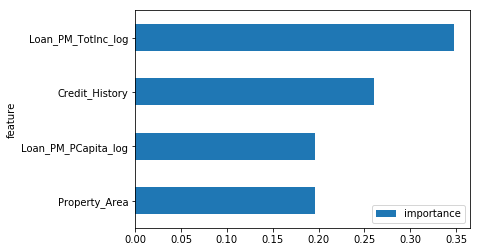

In [93]:
modelfit(gsearch3.best_estimator_, train, predictors)
gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_


Model Report
Accuracy : 0.8094
AUC Score (Train): 0.819665


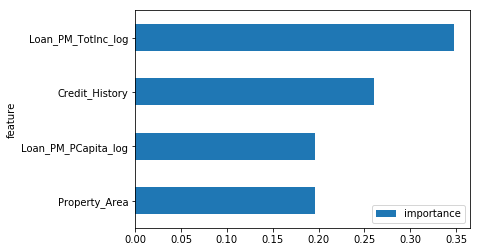

In [94]:
# Second classifier
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=140,
 max_depth=2,
 min_child_weight=8,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, train, predictors)

#### Searching the best 'subsample' & 'colsample_bytree' values

In [95]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=2,
 min_child_weight=8, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.77862, std: 0.03447, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.78840, std: 0.02939, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.79269, std: 0.02762, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.78976, std: 0.03153, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.77862, std: 0.03447, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.78840, std: 0.02939, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.79269, std: 0.02762, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.78976, std: 0.03153, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.76953, std: 0.03458, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.77648, std: 0.03435, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.79312, std: 0.02870, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.78773, std: 0.03657, params: {'colsample_bytree': 0.8, 'subsample'

In [96]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=2,
 min_child_weight=8, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=8, missing=None,
       n_estimators=140, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'subsample': [0.75, 0.8, 0.85], 'colsample_bytree': [0.75, 0.8, 0.85]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

#### Searching the best 'reg_alpha' values

In [97]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=2,
 min_child_weight=8, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch6.fit(train[predictors],train[target])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.79312, std: 0.02870, params: {'reg_alpha': 1e-05},
  mean: 0.79271, std: 0.02725, params: {'reg_alpha': 0.01},
  mean: 0.79078, std: 0.02895, params: {'reg_alpha': 0.1},
  mean: 0.78818, std: 0.03040, params: {'reg_alpha': 1},
  mean: 0.70554, std: 0.04776, params: {'reg_alpha': 100}],
 {'reg_alpha': 1e-05},
 0.7931179475838919)

In [98]:
param_test7 = {
 'reg_alpha':[1e-6, 1e-5, 1e-4]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=2,
 min_child_weight=8, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(train[predictors],train[target])
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

([mean: 0.79312, std: 0.02870, params: {'reg_alpha': 1e-05},
  mean: 0.79271, std: 0.02725, params: {'reg_alpha': 0.01},
  mean: 0.79078, std: 0.02895, params: {'reg_alpha': 0.1},
  mean: 0.78818, std: 0.03040, params: {'reg_alpha': 1},
  mean: 0.70554, std: 0.04776, params: {'reg_alpha': 100}],
 {'reg_alpha': 1e-05},
 0.7931179475838919)

#### Building the optimized model


Model Report
Accuracy : 0.8094
AUC Score (Train): 0.819665


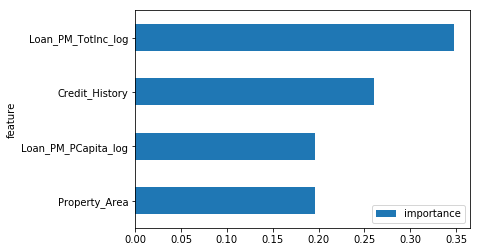

In [99]:
# Third classifier
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=110,
 max_depth=2,
 min_child_weight=8,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=1e-05,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 n_jobs=300)
modelfit(xgb3, train, predictors)

In [100]:
classification_model(xgb3, train,predictors,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [103]:
# Saving the prediction of the Test to the disc
test2 = test[predictors].copy()
submit = test['Loan_ID']
preds = xgb3.predict(test2)
preds = pd.Series(preds)
submit = pd.concat([submit, preds], names=['Loan_ID', 'Loan_Status'], axis=1)
submit.columns = ['Loan_ID', 'Loan_Status']
submit['Loan_Status'] = submit['Loan_Status'].map({1:'Y', 0:'N'})
submit.to_csv('submit/xgboost_tweaked.csv', index=False)

## LinearDiscriminantAnalysis

In [110]:
# Predicting with the LinearDiscriminantAnalysis model
model = LinearDiscriminantAnalysis()
predictor_var = [
 'Property_Area',
 'Credit_History',
 'Loan_PM_TotInc_log',
 'Loan_PM_PCapita_log'
]
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.782%


In [111]:
# Saving the prediction of the Test to the disc
test2 = test[predictor_var].copy()
submit = test['Loan_ID']
preds = model.predict(test2)
preds = pd.Series(preds)
submit = pd.concat([submit, preds], names=['Loan_ID', 'Loan_Status'], axis=1)
submit.columns = ['Loan_ID', 'Loan_Status']
submit['Loan_Status'] = submit['Loan_Status'].map({1:'Y', 0:'N'})
submit.to_csv('submit/LinearDiscriminantAnalysis.csv', index=False)

## Conclusion

#### These are the results of the modeling:  

| Model | Accuracy         
| :- |:-------------|
|KNN| 0.777777777777778  
|Gaussian Naive Bayes| 0.777777777777778  
|__SVM__| __0.784722222222222__  
|__XGBoost__| __0.784722222222222__  
|Linear Discriminant Analysis| 0.777777777777778  
|Ensemble| 0.777777777777778  

### The best predictive models are:
* SVM
* XGBoost